## Final Project

### Analysis of features extarcted from audio data

- link to dataset:

### Motivation and Goals

The goal of this project is to clasdify voice recoridngs as either male of female, based on numerical features extracted from the Mozilla common voice dataset.
The purpose of this project is ...


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


## Data Loading

In [2]:
with open("./data/data.csv", "r") as file:
    data_raw = pd.read_csv(file)

data_raw.head()

path  \
0  ./clips/common_voice_en_40187705.mp3   
1  ./clips/common_voice_en_40187697.mp3   
2  ./clips/common_voice_en_40187695.mp3   
3  ./clips/common_voice_en_40187693.mp3   
4  ./clips/common_voice_en_40187696.mp3   

                                            sentence sentence_domain      age  \
0  Any new copies were initialized with a success...             NaN  fifties   
1        He then led the life of a wandering hermit.             NaN  fifties   
2  Artume appeared as a recurring character in Ma...             NaN  fifties   
3  Cohousing cultivates a culture of sharing and ...             NaN  fifties   
4  In practice however the resistive element vari...             NaN  fifties   

           gender           accents  mfcc_01_mean  mfcc_02_mean  mfcc_03_mean  \
0  male_masculine  Canadian English   -449.487457    119.852509      7.753420   
1  male_masculine  Canadian English   -494.584290    125.826019     18.260662   
2  male_masculine  Canadian English   -503.006805    131.359589     15.189734   
3  male_masculine  Canadian English   -466.040344    111.497826      7.834814   
4  male_masculine  Canadian English   -473.256073    116.954979     12.820942   

   mfcc_04_mean  ...  spec_contrast_band_4_std  spec_contrast_band_5_std  \
0     30.211107  ...                  4.427589                  3.374920   
1     23.508959  ...                  4.600072                  4.264892   
2     18.775719  ...                  4.263854                  6.058417   
3     21.756237  ...                  4.760368                  4.768118   
4     26.763842  ...                  4.252196                  4.170021   

   spec_contrast_band_6_std  spec_contrast_band_7_std  spec_rolloff_mean  \
0                  8.790948                  4.794475        4491.619810   
1                  7.531223                  4.263827        4458.521793   
2                  6.529373                  3.953812        4289.709689   
3                  6.406526                  3.485832        4421.248209   
4                  5.473282                  3.982934        4656.431159   

   spec_rolloff_std  zcr_mean   zcr_std  rmse_mean  rmse_std  
0       2971.032386  0.078209  0.080991   0.021588  0.023391  
1       2792.566125  0.061128  0.059886   0.016811  0.020808  
2       2843.069699  0.067131  0.057595   0.013110  0.014007  
3       2540.725526  0.072797  0.060684   0.015802  0.019355  
4       2868.399050  0.082116  0.086288   0.016562  0.018280  

[5 rows x 94 columns]

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45358 entries, 0 to 45357
Data columns (total 94 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   path                       45358 non-null  object 
 1   sentence                   45358 non-null  object 
 2   sentence_domain            384 non-null    object 
 3   age                        44929 non-null  object 
 4   gender                     45358 non-null  object 
 5   accents                    38582 non-null  object 
 6   mfcc_01_mean               45358 non-null  float64
 7   mfcc_02_mean               45358 non-null  float64
 8   mfcc_03_mean               45358 non-null  float64
 9   mfcc_04_mean               45358 non-null  float64
 10  mfcc_05_mean               45358 non-null  float64
 11  mfcc_06_mean               45358 non-null  float64
 12  mfcc_07_mean               45358 non-null  float64
 13  mfcc_08_mean               45358 non-null  flo

In [4]:
# Sentence domain column has less than 400 rows
# Null values in columns accents and age

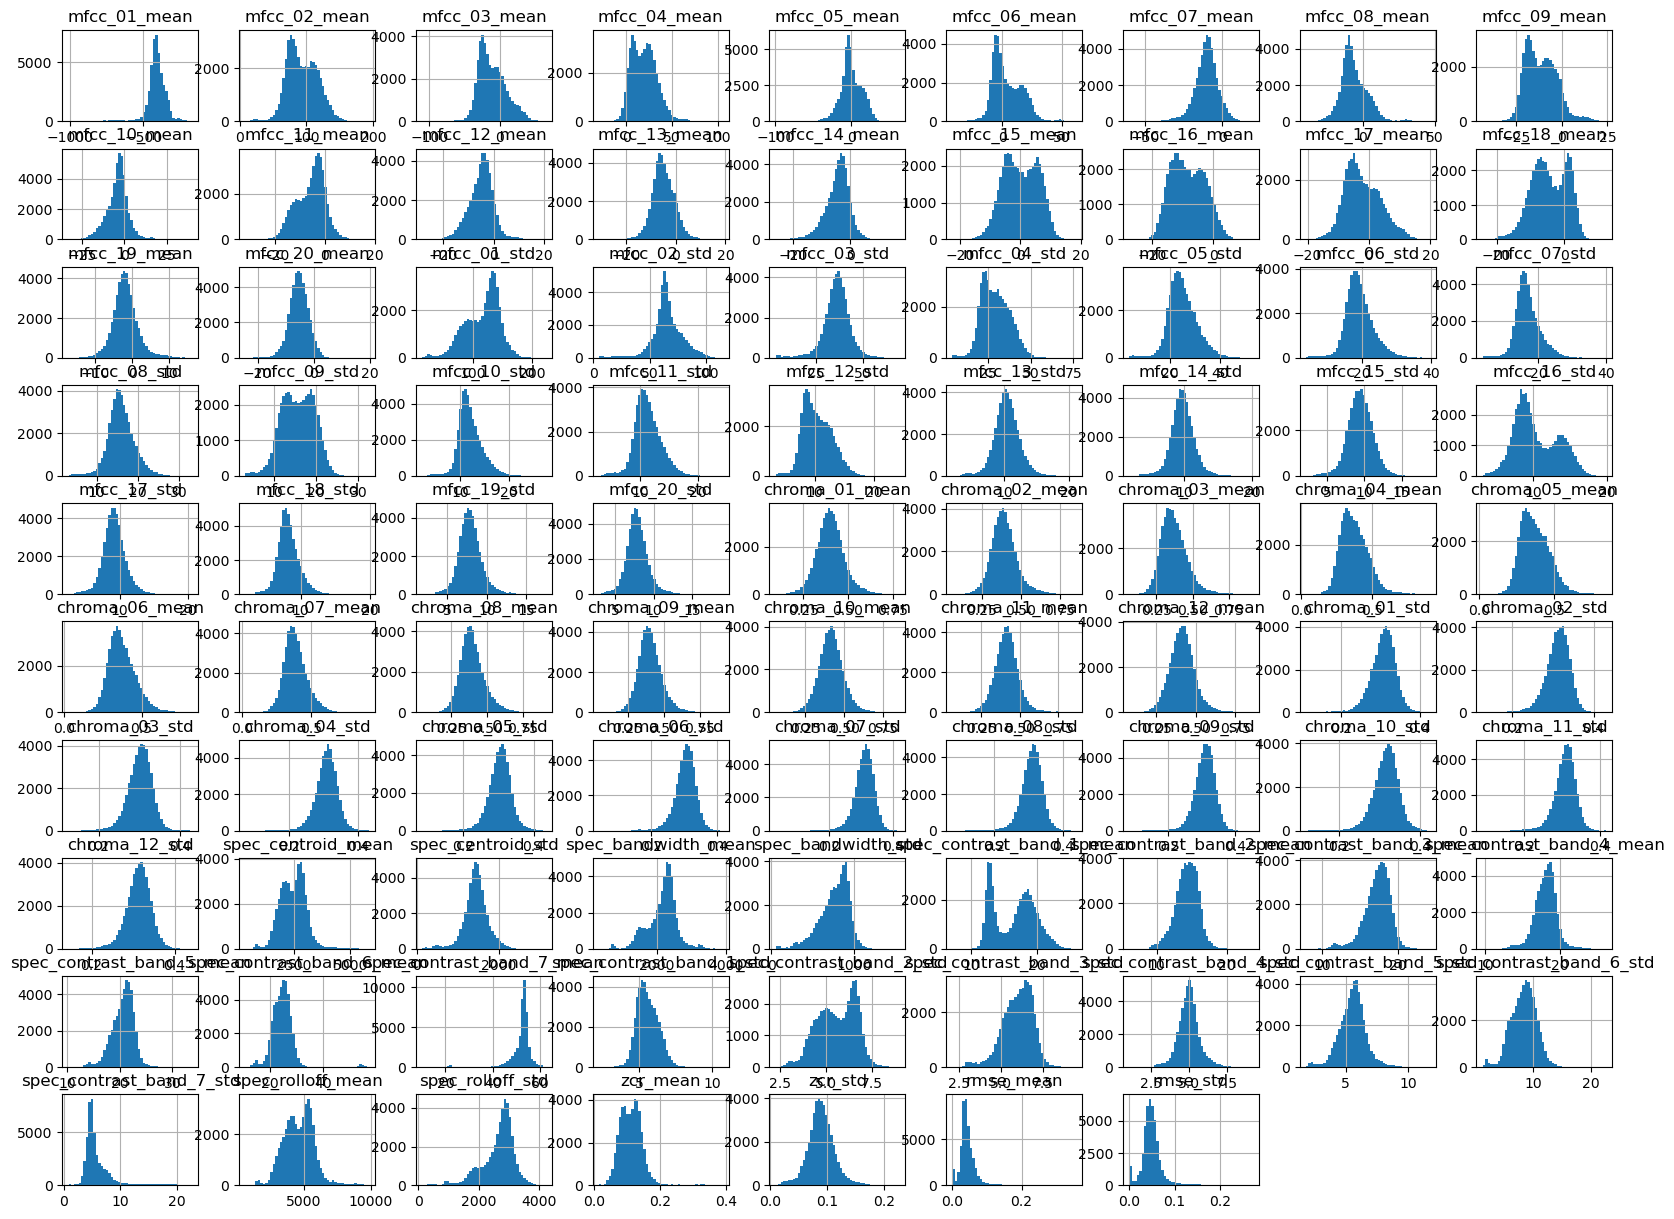

In [5]:
def histograms(data):
    """
    Function to plot histograms of the dataframe
    :param data: DataFrame
    :return: None
    """
    data.hist(figsize=(20, 15), bins=50)
    plt.show()
histograms(data_raw)

In [6]:
# drop sentence_domain
try:
    data_raw = data_raw.drop(columns=["sentence_domain"])
except:
    print("Column sentence_domain dropped")

In [7]:
# Data frames 
y= data_raw["gender"]
X= data_raw.drop(columns=["gender"])

# Train test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state= 27)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state= 27)

# Df only for EDA
df_eda = X_train.copy()
df_eda['y'] = y_train
df_eda_cat = df_eda.select_dtypes(include=['object'])
df_eda_num = df_eda.select_dtypes(include=['number'])

# Drop columns that are not needed
X_train= data_raw.drop(columns=["path", "age", "sentence", "accents"])
X_test = data_raw.drop(columns=["path", "age", "sentence", "accents"])
X_val = data_raw.drop(columns=["path", "age", "sentence", "accents"])




In [8]:
X_train.shape

(45358, 89)

In [9]:
X_val.shape

(45358, 89)

## EDA

In [10]:
df_eda.describe()

mfcc_01_mean  mfcc_02_mean  mfcc_03_mean  mfcc_04_mean  mfcc_05_mean  \
count  31750.000000  31750.000000  31750.000000  31750.000000  31750.000000   
mean    -413.160926     93.826893    -10.954199     19.219146      0.091906   
std       77.521500     22.987383     19.418417     13.710632     13.540915   
min    -1009.371521      8.527754   -109.845596    -29.976082    -99.547256   
25%     -437.286285     76.550581    -25.603632      8.085597     -7.697862   
50%     -410.252014     91.483578    -14.171050     18.636084     -1.271919   
75%     -376.689529    111.072508      1.539850     28.346101      9.394976   
max     -166.984146    187.015213     58.045757     87.805878     56.514290   

       mfcc_06_mean  mfcc_07_mean  mfcc_08_mean  mfcc_09_mean  mfcc_10_mean  \
count  31750.000000  31750.000000  31750.000000  31750.000000  31750.000000   
mean       3.920069    -10.175931     -5.900362    -11.164199     -3.909539   
std       12.333943      7.577992      9.189103      8.664023      6.343020   
min      -42.214890    -59.821255    -38.674179    -43.236217    -32.694038   
25%       -5.330329    -14.250074    -11.767092    -18.112113     -7.223097   
50%        0.867108     -9.771422     -7.378211    -12.017797     -3.364649   
75%       13.258081     -5.661729     -0.513922     -5.138829     -0.359547   
max       62.071381     19.852123     43.599442     23.704273     39.869076   

       ...  spec_contrast_band_4_std  spec_contrast_band_5_std  \
count  ...              31750.000000              31750.000000   
mean   ...                  5.022503                  5.529991   
std    ...                  0.703414                  1.082293   
min    ...                  1.088558                  1.785507   
25%    ...                  4.607092                  4.893048   
50%    ...                  5.018587                  5.593813   
75%    ...                  5.395852                  6.157941   
max    ...                  9.229922                 11.560216   

       spec_contrast_band_6_std  spec_contrast_band_7_std  spec_rolloff_mean  \
count              31750.000000              31750.000000       31750.000000   
mean                   8.388430                  6.006000        4630.162290   
std                    2.182198                  2.878234        1161.710485   
min                    1.225389                  0.858722         614.009534   
25%                    6.919372                  4.518688        3823.999803   
50%                    8.513997                  5.106260        4652.733466   
75%                    9.890623                  6.449240        5393.291880   
max                   22.740114                 22.756141        9875.266638   

       spec_rolloff_std      zcr_mean       zcr_std     rmse_mean  \
count      31750.000000  31750.000000  31750.000000  31750.000000   
mean        2638.336833      0.113107      0.089829      0.045095   
std          546.851139      0.037700      0.023278      0.028336   
min          132.853695      0.014346      0.010137      0.000010   
25%         2398.940269      0.087189      0.076157      0.031728   
50%         2772.059424      0.111543      0.089220      0.039935   
75%         2986.512156      0.133323      0.103309      0.052181   
max         4217.979050      0.388499      0.226764      0.323416   

           rmse_std  
count  31750.000000  
mean       0.050852  
std        0.026195  
min        0.000009  
25%        0.038415  
50%        0.048035  
75%        0.058528  
max        0.271961  

[8 rows x 88 columns]

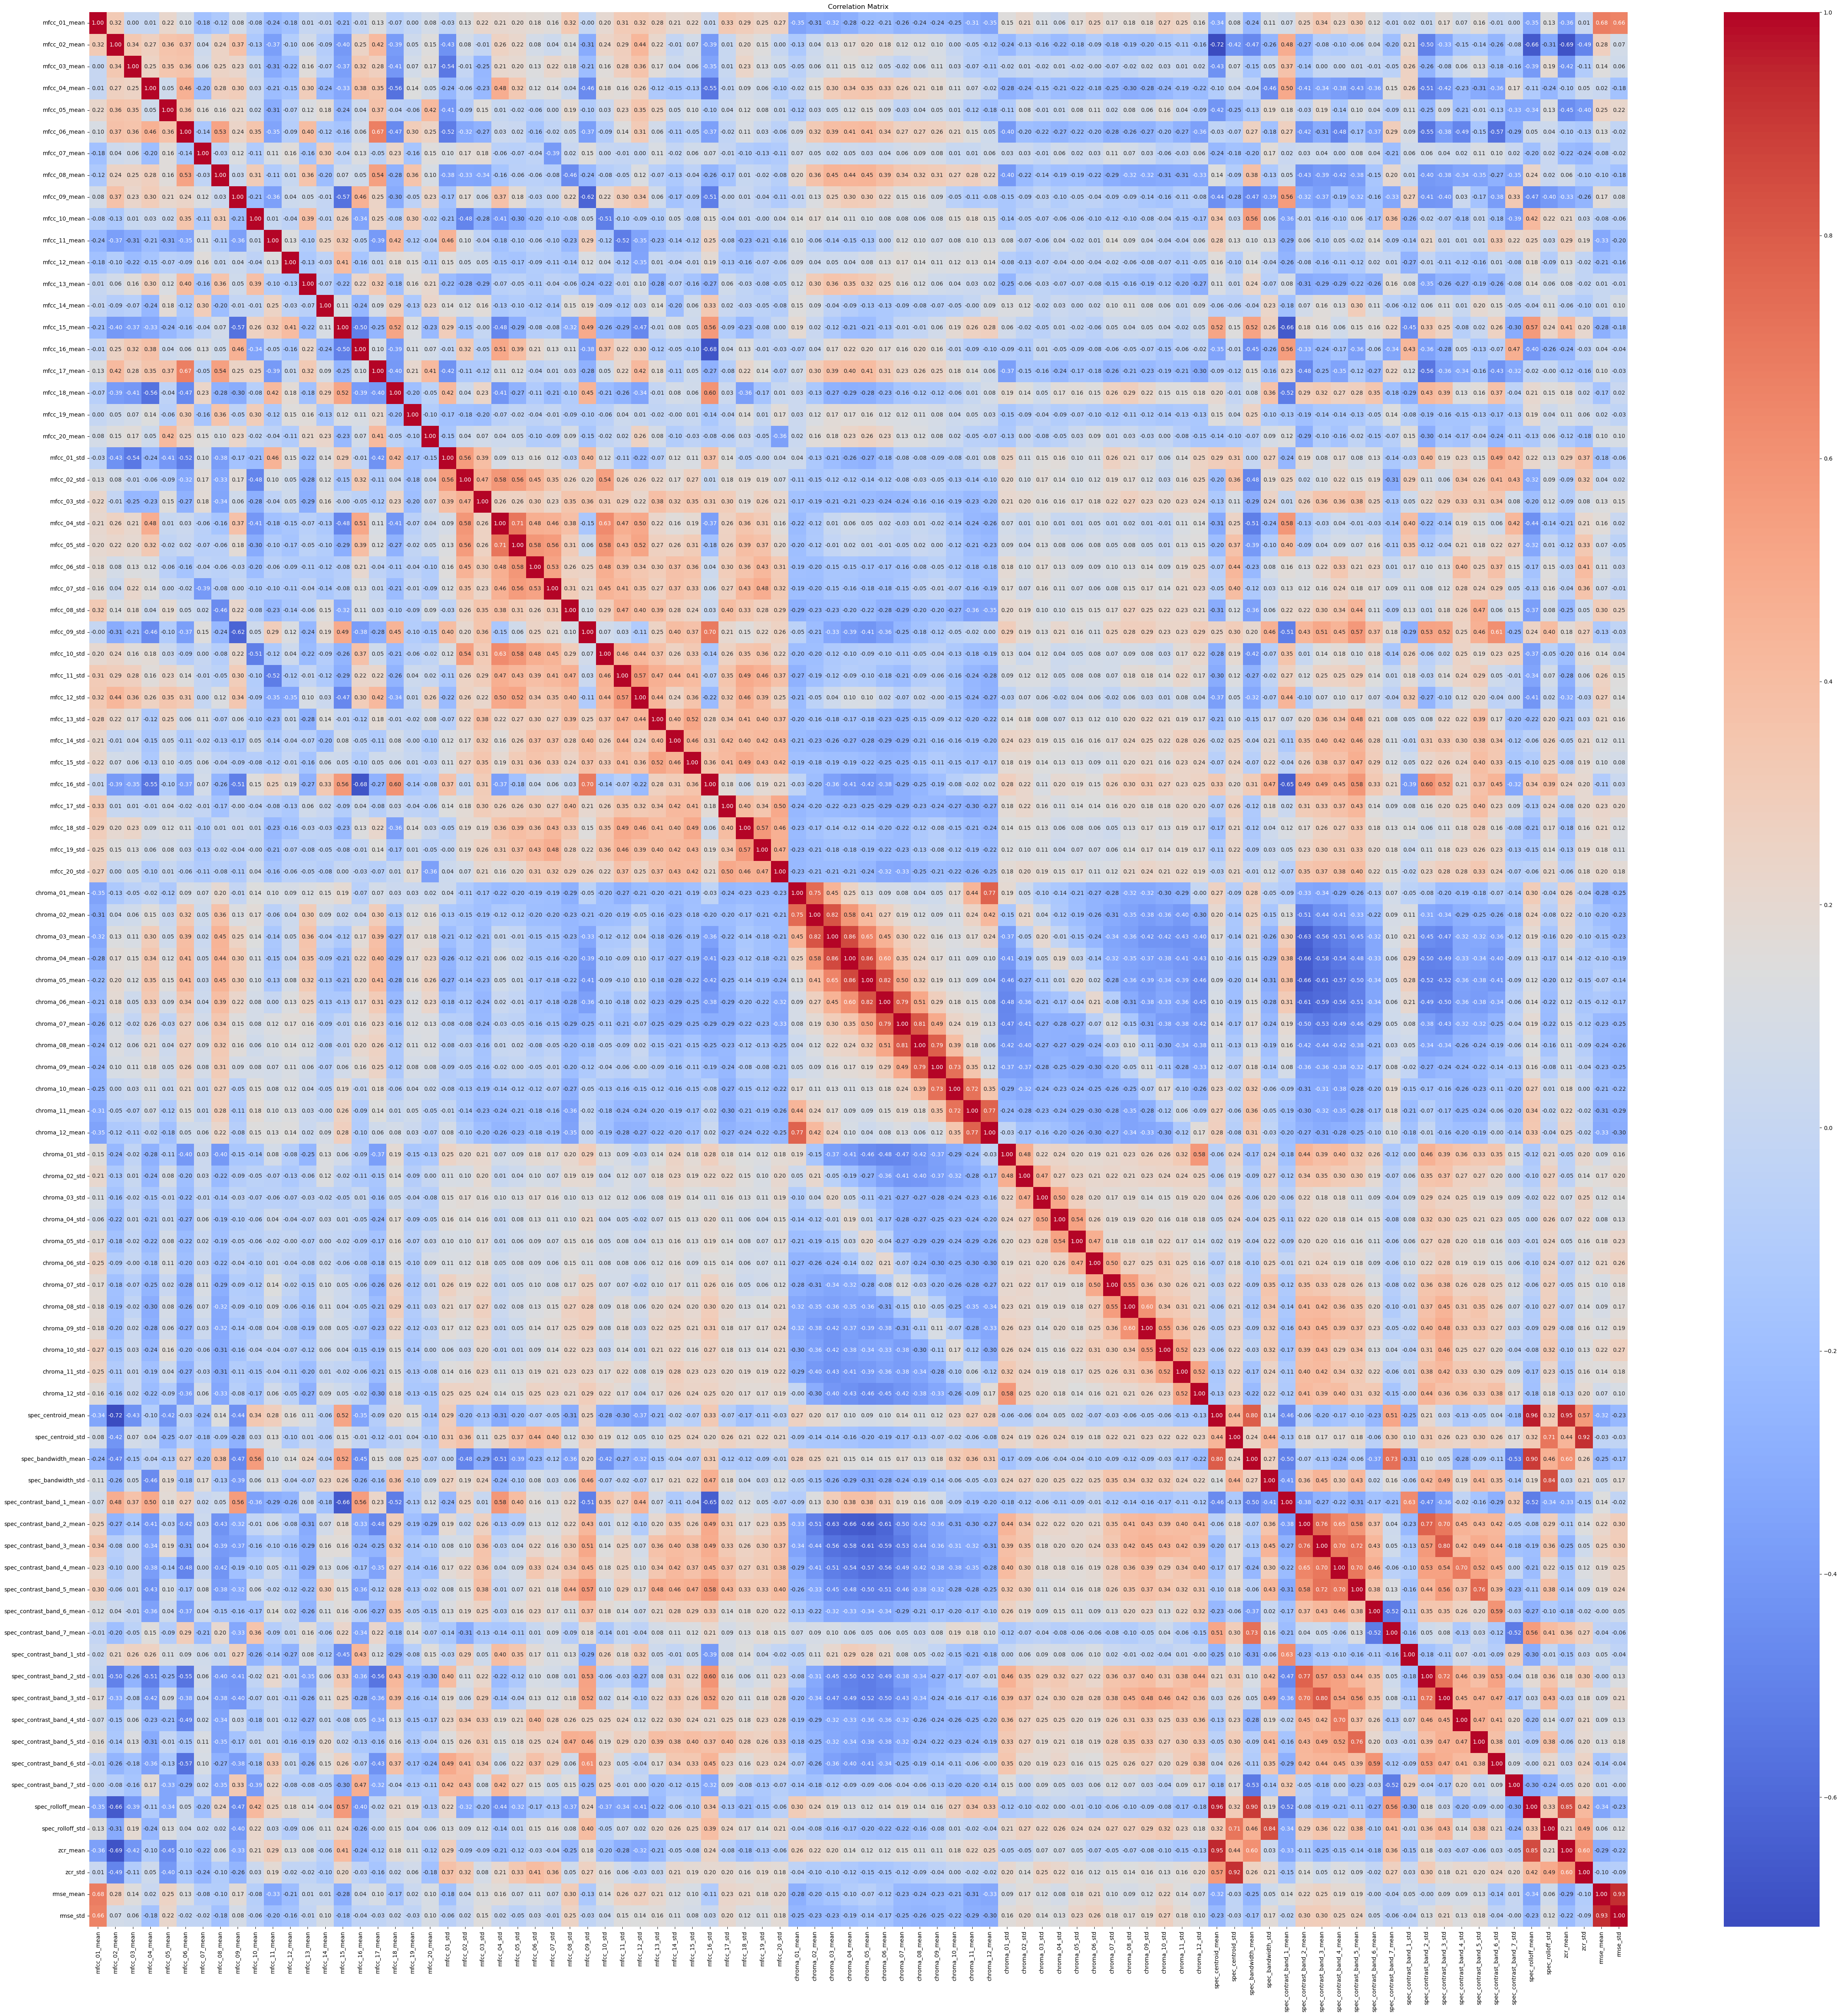

In [14]:
# Correlation Matrix
def generate_correlation_matrix(df):
    plt.figure(figsize=(50, 50))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
generate_correlation_matrix(df_eda_num)